#### Simple Chatbot Using Langgraph

In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.8 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


In [ ]:
from google.colab import userdata
groq_api_key= userdata.get("groq_api_key")
langsmith= userdata.get("Langsmith_API_KEY")


In [ ]:
import os
os.environ["Langsmith_API_KEY"]=  langsmith
os.environ["LANGCHAIN_TRACING_V2"]= "true"
os.environ["LANGCHAIN_PROJECT"]= "CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key= groq_api_key, model_name= "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7aad8af54310>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7aad8af54e90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

#### Start Building Using LangGraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [ ]:

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)
graph_builder

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph= graph_builder.compile()

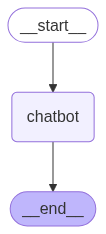

In [ ]:
graph

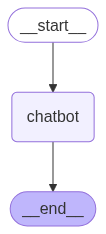

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input= input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assitant: ", value["messages"].content)


User: Hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.00191941, 'queue_time': 0.019285988, 'total_time': 0.029192137}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--7364a6cd-14dd-4ea0-8f16-7ad2ad3acb25-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.00191941, 'queue_time': 0.019285988, 'total_time': 0.029192137}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--7364a6cd-

User: What is AGI


dict_values([{'messages': AIMessage(content="AGI stands for **Artificial General Intelligence**. It refers to a type of artificial intelligence that possesses the ability to understand, learn, and apply knowledge across a wide range of tasks, much like a human. \n\nHere's a breakdown:\n\n**Key Characteristics of AGI:**\n\n* **Generalization:** AGI systems can adapt to new situations and solve problems they haven't been explicitly programmed for.\n* **Common Sense:** AGI aims to mimic human-like common sense and reasoning abilities.\n* **Learning and Adaptability:** AGI systems can learn from experience and improve their performance over time.\n* **Creativity and Innovation:** AGI could potentially exhibit creative problem-solving and generate novel ideas.\n* **Consciousness and Self-Awareness:** This is a highly debated aspect, with some believing AGI will eventually develop consciousness, while others argue it's beyond the realm of possibility.\n\n**Current State of AGI:**\n\nWhile si

User: What is Agentic AI


dict_values([{'messages': AIMessage(content="Agentic AI refers to a type of artificial intelligence that exhibits **autonomous action and goal-directed behavior**. \n\nHere's a breakdown:\n\n**Key Characteristics:**\n\n* **Autonomy:** Agentic AI systems can operate independently, making decisions and taking actions without constant human intervention.\n* **Goal-Oriented:** They are designed with specific goals in mind and strive to achieve them through their actions.\n* **Proactive:** Agentic AI doesn't simply react to stimuli; it can anticipate future events and take preemptive actions.\n* **Learning and Adaptation:** Many agentic AI systems incorporate learning mechanisms, allowing them to improve their performance and adapt to changing environments.\n\n**Examples:**\n\n* **Self-driving cars:** They navigate roads, make decisions about speed and lane changes, and avoid obstacles autonomously.\n* **Chatbots:** Advanced chatbots can engage in natural conversations, understand user inte

User: What is AI Agent


dict_values([{'messages': AIMessage(content='An AI Agent is essentially a software program that can perceive its environment, make decisions, and take actions to achieve specific goals. Think of it like a virtual assistant, but with more advanced capabilities.\n\nHere\'s a breakdown:\n\n**Key Characteristics:**\n\n* **Autonomy:** AI agents can operate independently, without constant human intervention.\n* **Goal-Oriented:** They are designed to achieve predefined objectives, whether it\'s playing a game, answering questions, or controlling a robot.\n* **Perception:** They can gather information about their surroundings through sensors (like cameras, microphones, or data feeds) or by interacting with other systems.\n* **Decision-Making:** They use algorithms and learned patterns to analyze information and choose the best course of action.\n* **Action:** They can execute actions in their environment, such as moving, speaking, or manipulating objects.\n\n**Types of AI Agents:**\n\n* **Sim

User: q
Good Bye
